In [8]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

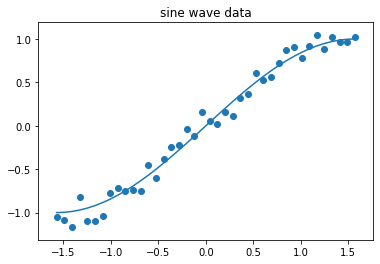

In [6]:
plt.figure()

#true data
N = 40
X = np.linspace(-np.pi/2, np.pi/2, N).reshape(N,1)
y = np.sin(X)
plt.plot(X, y)

#add noise
y += 0.1 * np.random.randn(N,1)

plt.scatter(X,y)
plt.title('sine wave data')
plt.show()

In [7]:
#실습 데이터 만들기
n_feature = 2

PHI = np.ones(X.shape[0]).reshape(-1,1) #40 * 1 
for i in range(1, n_feature):
    PHI = np.concatenate((PHI, np.power(X, i)), axis = 1)  #하나의 feature matrix로 같이 보겠다
print('PHI.shape', PHI.shape)
print("PHI[:3] \n", PHI[:3])

#shuffle
idx = np.random.permutation(N)
shuffle_X = X[idx]
shuffle_PHI = PHI[idx]
shuffle_y = y[idx]

PHI.shape (40, 2)
PHI[:3] 
 [[ 1.         -1.57079633]
 [ 1.         -1.49024267]
 [ 1.         -1.40968901]]


In [11]:
n = N - 20

#train data (20개)
X_train = shuffle_X[:n]
PHI_train = shuffle_PHI[:n]
y_train = shuffle_y[:n]

print(PHI_train)
print(PHI_train.shape)

#test data contains train data
#actually, it shouldn't happen
X_test = shuffle_X[:]
PHI_test = shuffle_PHI[:]
y_test = shuffle_y[:]

print(PHI_test)
print(PHI_test.shape)

[[ 1.         -1.57079633]
 [ 1.         -0.68470609]
 [ 1.          0.12083049]
 [ 1.          0.44304512]
 [ 1.          0.04027683]
 [ 1.         -0.84581341]
 [ 1.          0.2819378 ]
 [ 1.          0.92636706]
 [ 1.          0.20138414]
 [ 1.         -0.92636706]
 [ 1.          1.49024267]
 [ 1.         -0.60415243]
 [ 1.          1.16802804]
 [ 1.          1.08747438]
 [ 1.          0.68470609]
 [ 1.          1.57079633]
 [ 1.         -0.04027683]
 [ 1.         -0.2819378 ]
 [ 1.          1.00692072]
 [ 1.         -1.2485817 ]]
(20, 2)
[[ 1.         -1.57079633]
 [ 1.         -0.68470609]
 [ 1.          0.12083049]
 [ 1.          0.44304512]
 [ 1.          0.04027683]
 [ 1.         -0.84581341]
 [ 1.          0.2819378 ]
 [ 1.          0.92636706]
 [ 1.          0.20138414]
 [ 1.         -0.92636706]
 [ 1.          1.49024267]
 [ 1.         -0.60415243]
 [ 1.          1.16802804]
 [ 1.          1.08747438]
 [ 1.          0.68470609]
 [ 1.          1.57079633]
 [ 1.         -0.04

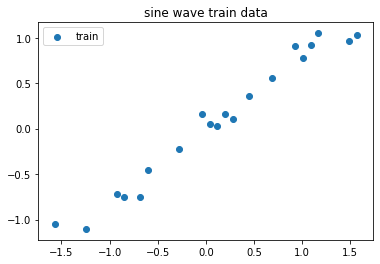

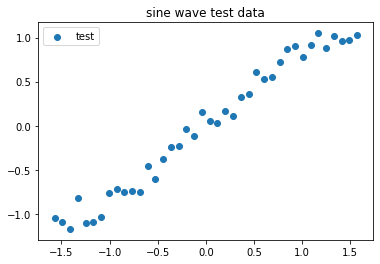

In [12]:
#plot
plt.figure()
plt.scatter(X_train, y_train, label = 'train')
plt.legend()
plt.title('sine wave train data')
plt.show()

plt.figure()
plt.scatter(X_test, y_test, label = 'test')
plt.legend()
plt.title('sine wave test data')
plt.show()

#### Linear Regression

##### method 1 : compute W and b with numpy

In [13]:
#compute W_ with PHI_train
W_ = np.linalg.inv(PHI_train.T @ PHI_train) @PHI_train.T @y_train #@: 인자들 간의 곱
print('[b,W] = W_')
print('W_.shape', W_.shape)
print('W_\n', W_)

[b,W] = W_
W_.shape (2, 1)
W_
 [[-0.00802692]
 [ 0.77459172]]


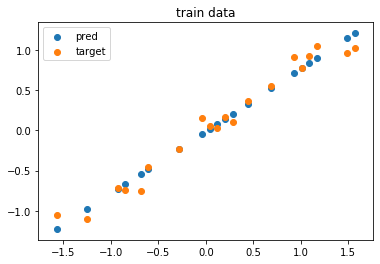

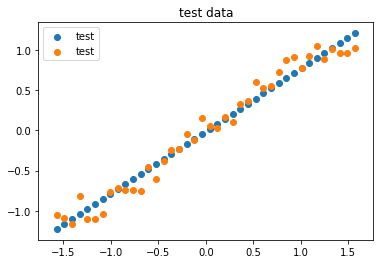

In [14]:
#plot
plt.figure()
plt.scatter(X_train, PHI_train @ W_, label = 'pred')  #예측값 계산해 plot
plt.scatter(X_train, y_train, label = 'target') 
plt.legend()
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, PHI_test @ W_, label = 'test')
plt.scatter(X_test, y_test, label = 'test')
plt.legend()
plt.title('test data')
plt.show()

##### method 2: compute W and b wtih sklearn library

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

print('b: ', reg.intercept_ )
print('W: ', reg.coef_)

b:  [-0.00802692]
W:  [[0.77459172]]


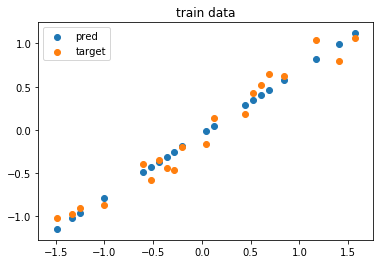

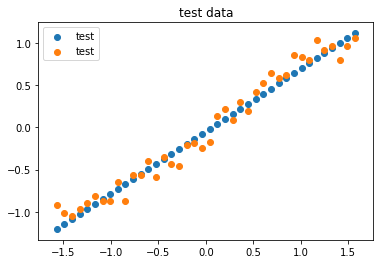

In [17]:
#plot
plt.figure()
plt.scatter(X_train, reg.predict(X_train), label = 'pred')  #예측값 계산해 plot
plt.scatter(X_train, y_train, label = 'target') 
plt.legend()
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, reg.predict(X_test), label = 'test')
plt.scatter(X_test, y_test, label = 'test')
plt.legend()
plt.title('test data')
plt.show()

##### method 3: compute W and b with tensorflow library

In [16]:
tf.reset_default_graph() #tensorflow 그래프 초기화
tf_PHI = tf.placeholder(tf.float32, [None, n_feature]) #placeholder: 외부 데이터 불러옴
tf_y = tf.placeholder(tf.float32, [None, 1])

#train with PHI_train, so w shape is [n_feature, 1]
w = tf.get_variable('w', [n_feature, 1])

#train without bias. (PHI_train term have 1, have bias already)
y_pred = tf_PHI @ w

loss = tf.reduce_mean(tf.reduce_sum(tf.pow(tf_y - y_pred, 2), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(1e-1).minimize(loss)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for i in range(1000):
    sess.run(optimizer, feed_dict = {tf_PHI: PHI_train, tf_y: y_train})
    
  print('[b, W]: ', sess.run(w))
  y_train_pred = sess.run(y_pred, feed_dict = {tf_PHI: PHI_train})
  y_test_pred = sess.run(y_pred, feed_dict = {tf_PHI: PHI_test})

[b, W]:  [[-0.00802694]
 [ 0.77459186]]


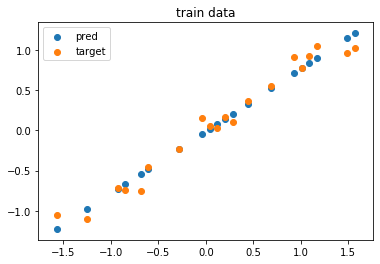

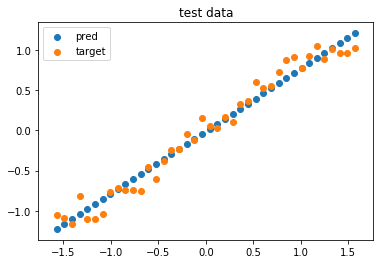

In [17]:
plt.figure()
plt.scatter(X_train, y_train_pred, label = 'pred')
plt.scatter(X_train, y_train, label= 'target')
plt.legend()
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, y_test_pred, label = 'pred')
plt.scatter(X_test, y_test, label= 'target')
plt.legend()
plt.title('test data')
plt.show()

##### simple data

In [18]:
# true data
N = 100
X = np.linspace(-np.pi, np.pi, N).reshape(N, 1)
real_y = np.sin(X)

#data noise
y = real_y + 0.1 * np.random.randn(N, 1)

#shuffle
idx = np.random.permutation(N)
X_ = X[idx]
y_ = y[idx]

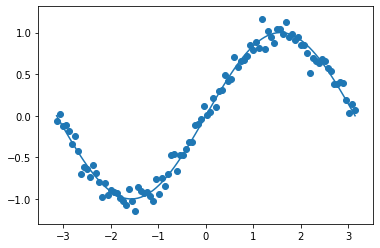

In [19]:
#show
plt.figure()
plt.plot(X, real_y)
plt.scatter(X, y)
plt.show()

In [20]:
n = N - 20

X_train = X_[:n]
y_train = y_[:n]
X_test = X_[n:]
y_test = y_[n:]

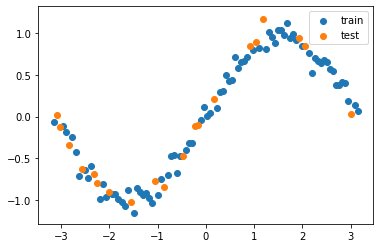

In [21]:
plt.figure()
plt.scatter(X_train, y_train, label = 'train')
plt.scatter(X_test, y_test, label = 'test')
plt.legend()
plt.show()

#### Multi-layer Linear Regression

##### Hyper parameter setting

In [22]:
learning_rate = 1e-1
training_epochs = 1000 #전체 데이터를 사용하여 학습시키는 빈도

In [26]:
tf.reset_default_graph()

#placeholder
tf_X = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])

#variables
w1 = tf.get_variable('w1', [1,1])
b1 = tf.get_variable('b1', [1])
w2 = tf.get_variable('w2', [1,1])
b2 = tf.get_variable('b2', [1])

#model
output1 = tf_X @ w1 + b1
hidden1 = tf.nn.sigmoid(output1)
y_pred = hidden1 @ w2 + b2

#loss and optimizer
loss = tf.reduce_mean(tf.reduce_sum(tf.pow(tf_y - y_pred, 2), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [28]:
with tf.Session() as sess:
  # init
  sess.run(tf.global_variables_initializer())
  
  #train
  for i in range(1000):
    sess.run(optimizer, feed_dict = {tf_X: X_train, tf_y: y_train})
    
  #result
  y_train_pred = sess.run(y_pred, feed_dict = {tf_X: X_train})
  y_whole_pred = sess.run(y_pred, feed_dict = {tf_X: X_})

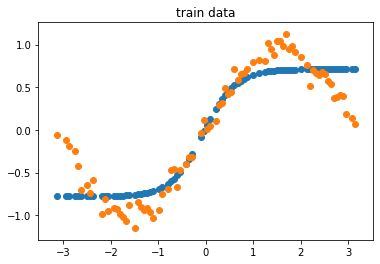

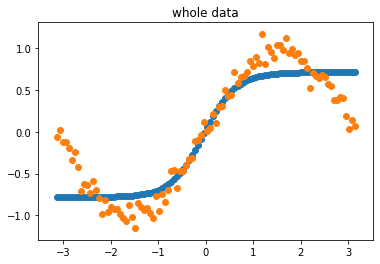

In [25]:
plt.figure()
plt.scatter(X_train,y_train_pred,label='pred')
plt.scatter(X_train,y_train,label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_,y_whole_pred,label='pred')
plt.scatter(X_,y_,label='target')
plt.title('whole data')
plt.show()

#### Make model with tf.layers.dense

In [31]:
tf.reset_default_graph()

#place holder
tf_X = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])

#model
hidden1 = tf.layers.dense(tf_X, 1, activation = tf.nn.sigmoid)
y_pred = tf.layers.dense(hidden1, 1)

#loss and optimizer
loss = tf.losses.mean_squared_error(tf_y, y_pred)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    #init
    sess.run(tf.global_variables_initializer())
    
    #train
    for i in range(training_epochs):
        sess.run(optimizer, feed_dict = {tf_X: X_train, tf_y : y_train})
        
    #result
    y_train_pred = sess.run(y_pred, feed_dict = {tf_X : X_train})
    y_whole_pred = sess.run(y_pred, feed_dict = {tf_X : X_})

#### Plot loss graph

In [34]:
tf.reset_default_graph()

#placeholder
tf_X = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])

#model
hidden1 = tf.layers.dense(tf_X, 1, activation = tf.nn.sigmoid)
y_pred = tf.layers.dense(hidden1, 1)

#loss an optimizer
loss = tf.losses.mean_squared_error(tf_y, y_pred)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    #init
    sess.run(tf.global_variables_initializer())
    
    #train
    losses = []
    for i in range(training_epochs):
        _, I = sess.run([optimizer, loss], feed_dict = {tf_X : X_train, tf_y : y_train})
        losses.append(I)
        
    #result
    y_train_pred = sess.run(y_pred, feed_dict = {tf_X : X_train})
    y_whole_pred = sess.run(y_pred, feed_dict = {tf_X : X_})

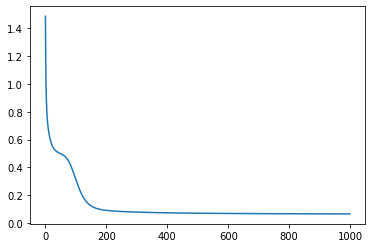

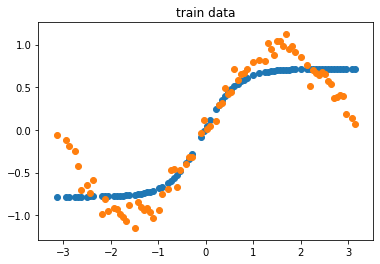

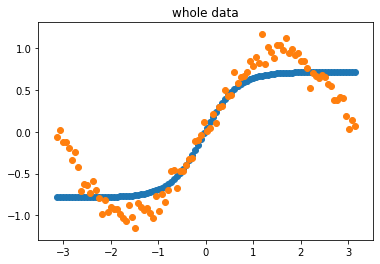

In [35]:
###plot loss
plt.figure()
plt.plot(losses)
plt.show()

plt.figure()
plt.scatter(X_train,y_train_pred,label='pred')
plt.scatter(X_train,y_train,label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_,y_whole_pred,label='pred')
plt.scatter(X_,y_,label='target')
plt.title('whole data')
plt.show()

In [49]:
tf.reset_default_graph()

#placeholder
tf_X = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])

#model
hidden1 = tf.layers.dense(tf_X, 10, activation = tf.nn.sigmoid)
w = tf.get_variable('w', shape = [10, 10])
hidden2 = hidden1 @ w
y_pred = tf.layers.dense(hidden2, 1)

#loss and optimizer
loss = tf.losses.mean_squared_error(tf_y, y_pred)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    #init
    sess.run(tf.global_variables_initializer())
    
    #train
    losses = []
    for i in range(training_epochs):
        _, I = sess.run([optimizer, loss], feed_dict = {tf_X : X_train, tf_y : y_train})
        losses.append(I)
        
    #result
    y_train_pred = sess.run(y_pred, feed_dict = {tf_X: X_train})
    y_whole_pred = sess.run(y_pred, feed_dict = {tf_X : X_})

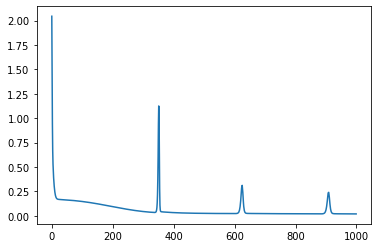

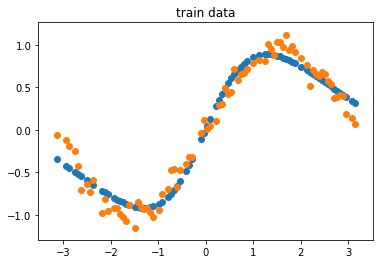

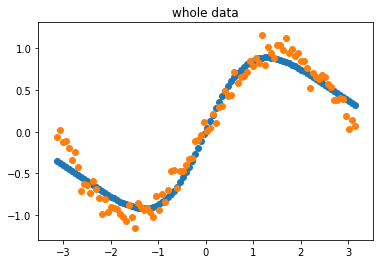

In [50]:
#plot loss
plt.figure()
plt.plot(losses)
plt.show()

plt.figure()
plt.scatter(X_train, y_train_pred, label = 'pred')
plt.scatter(X_train, y_train, label = 'target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_, y_whole_pred, label = 'pred')
plt.scatter(X_, y_, label = 'target')
plt.title('whole data')
plt.show()

#### sumup

In [51]:
#hyperparameter setting
learning_rate = 1e-1
training_code = 1000

h = 10 #number of hidden layer node
act = tf.nn.tanh #activation function

In [57]:
tf.reset_default_graph()

tf_X = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])

hidden1 = tf.layers.dense(tf_X, h, activation = act)
y_pred = tf.layers.dense(hidden1, 1)

loss = tf.losses.mean_squared_error(y_train, y_pred)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    losses = []
    for i in range(training_code):
        _, I = sess.run([optimizer, loss], feed_dict = {tf_X : X_train, tf_y : y_train})
        losses.append(I)
        
    y_train_pred = sess.run(y_pred, feed_dict = {tf_X : X_train})
    y_whole_pred = sess.run(y_pred, feed_dict = {tf_X : X_})

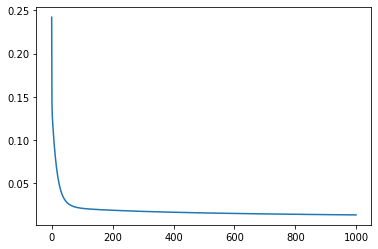

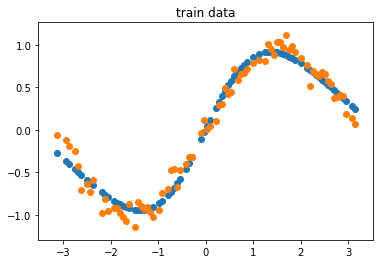

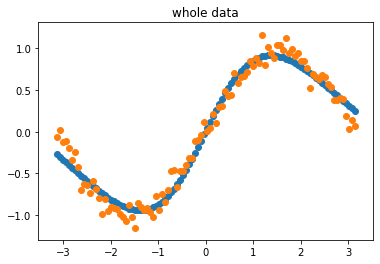

In [58]:
#plot loss
plt.figure()
plt.plot(losses)
plt.show()

plt.figure()
plt.scatter(X_train,y_train_pred,label='pred')
plt.scatter(X_train,y_train,label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_,y_whole_pred,label='pred')
plt.scatter(X_,y_,label='target')
plt.title('whole data')
plt.show()